In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
titanic_train = pd.read_csv(r'C:\Users\Tauseef\Desktop\Desktop\NN NCBC NVT\Titanic\Data\train.csv')
titanic_test = pd.read_csv(r'C:\Users\Tauseef\Desktop\Desktop\NN NCBC NVT\Titanic\Data\test.csv')

In [4]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

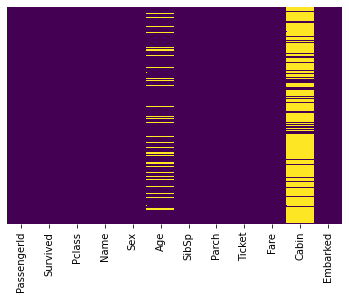

In [6]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

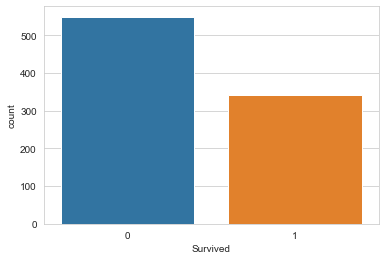

In [7]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",data = titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

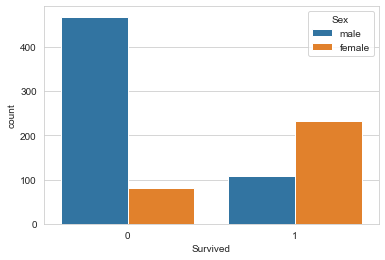

In [8]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue = "Sex",data = titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

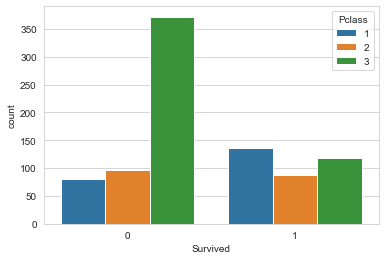

In [9]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived",hue = "Pclass",data = titanic_train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

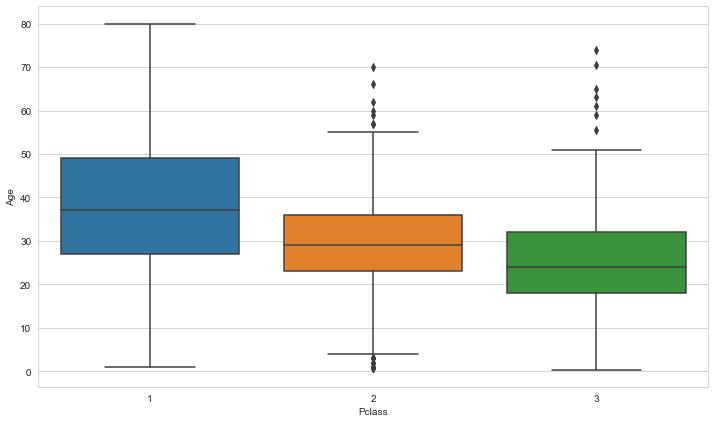

In [10]:
figure(figsize = (12,7))
sns.boxplot(x = "Pclass",y = "Age",data = titanic_train)

In [11]:
def newAge(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if (Pclass == 1):
            return 37
            
        elif (Pclass == 2):
            return 28
        
        else:
            return 24
    else:
        return Age

In [12]:
titanic_train["Age"] = titanic_train[["Age","Pclass"]].apply(newAge,axis = 1)

<AxesSubplot:>

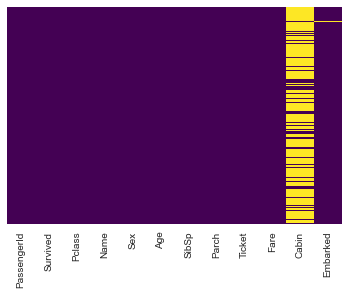

In [13]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
titanic_train = titanic_train.drop(["Cabin","Name","PassengerId","SibSp","Parch","Ticket"],axis=1)

In [15]:
sex = pd.get_dummies(titanic_train["Sex"],drop_first=True)

In [16]:
titanic_train = titanic_train.drop(["Sex"],axis=1)
titanic_train = pd.concat([titanic_train,sex],axis=1)
titanic_train

,Survived,Pclass,Age,Fare,Embarked,male
0,0,3,22.0,7.2500,S,1
1,1,1,38.0,71.2833,C,0
2,1,3,26.0,7.9250,S,0
3,1,1,35.0,53.1000,S,0
4,0,3,35.0,8.0500,S,1
...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,1
887,1,1,19.0,30.0000,S,0
888,0,3,24.0,23.4500,S,0
889,1,1,26.0,30.0000,C,1


In [17]:
titanic_train.describe()

,Survived,Pclass,Age,Fare,male
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.054063,32.204208,0.647587
std,0.486592,0.836071,13.245055,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,26.000000,14.454200,1.000000
75%,1.000000,3.000000,37.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


In [46]:
st = StandardScaler()

In [47]:
titanic_train

,Survived,Pclass,Age,Fare,Embarked,male
0,0,3,22.0,7.2500,S,1
1,1,1,38.0,71.2833,C,0
2,1,3,26.0,7.9250,S,0
3,1,1,35.0,53.1000,S,0
4,0,3,35.0,8.0500,S,1
...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,1
887,1,1,19.0,30.0000,S,0
888,0,3,24.0,23.4500,S,0
889,1,1,26.0,30.0000,C,1


In [48]:
XX = titanic_train.to_numpy()[:,[5]]
YY = titanic_train.to_numpy()[:,0]
print(XX.shape)
print(YY.shape)

(891, 1)
(891,)


In [49]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
Y_train= Y_train.astype('int')

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.3)

In [52]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(623, 1) (268, 1) (623,) (268,)


In [66]:
X_train = np.array(X_train).astype("float32")
Y_train = np.array(Y_train).astype("float32")

In [71]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(16, kernel_regularizer='l2'),
    Dense(8, activation='relu'),
    Dense(4, kernel_regularizer='l2'),
    Dense(1, activation='sigmoid'),
])

In [72]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
Total params: 2,913
Trainable params: 2,913
Non-trainable params: 0
____________________________________________________

In [74]:
hist = model.fit(X_train, Y_train,batch_size=32, epochs=50)

Epoch 1/50
20/20 [==============================] - 0s 948us/step - loss: 0.9443 - accuracy: 0.4382
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.8561 - accuracy: 0.6276
Epoch 3/50
20/20 [==============================] - 0s 999us/step - loss: 0.7835 - accuracy: 0.6276
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7347 - accuracy: 0.6276
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7026 - accuracy: 0.6276
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6998
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.7913
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6435 - accuracy: 0.7913
Epoch 9/50
20/20 [==============================] - 0s 972us/step - loss: 0.6278 - accuracy: 0.7913
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7913
Epoch 11/50
2

In [21]:
X_train.shape

(891, 1)

In [22]:
# Y_train = Y_train.reshape(891,1)
Y_train= Y_train.astype('int')

In [23]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [24]:
model.predict(X_train)
model.score(X_train,Y_train)

0.7867564534231201